![pancakespilesPythonlists.png](http://ungrid.unal.edu.co/gjhernandezp/algorithms/pancakes/pancakespilesPythonlistsonespatula.png)

# Modificando el codigo para poder hallar la profundidad de la solución

In [1]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display
import itertools


In [2]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [3]:
def ModifiedBFS(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = {}
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = 0
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    print("p(n) es {}".format(visited[lstr(s)]+1))
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = visited[lstr(s)]+1
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

p(n) es 2


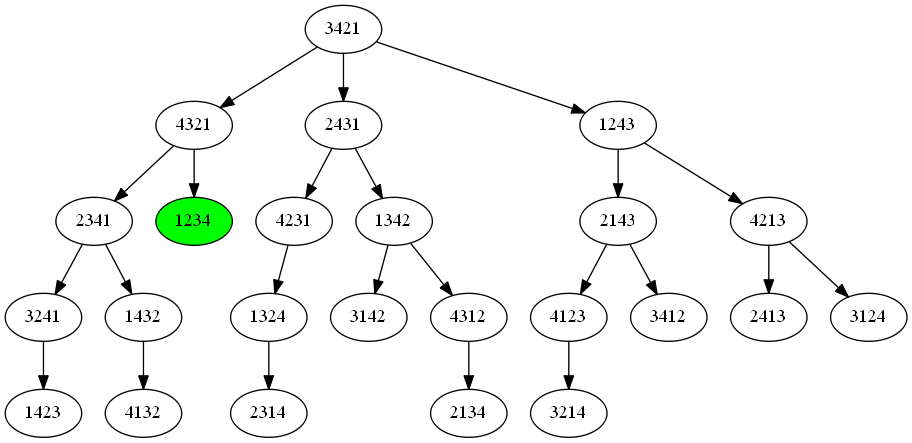

In [4]:
p = [3,4,2,1]
ModifiedBFS(p)

# Eliminando la parte visual

In [5]:
def calcularTiempoParaPermutacion(s): 

        visited = {}
        queue = [] 
        queue.append(s) 
        visited[lstr(s)] = 0
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                  if(d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    return visited[lstr(s)]+1
                  queue.append(d) 
                  visited[lstr(d)] = visited[lstr(s)]+1
        return 0

In [6]:
def peorCaso(n):
    elementos=list(range (1,n+1))
    maximoVueltas = 0
    peorPermutacion = elementos
    for permutacion in itertools.permutations(elementos):
        cantidadVueltas = calcularTiempoParaPermutacion(list(permutacion))
        peorPermutacion = list(permutacion) if maximoVueltas < cantidadVueltas else peorPermutacion
        maximoVueltas = max(maximoVueltas, cantidadVueltas)
    return maximoVueltas, peorPermutacion

In [7]:
peorCaso(4)

(4, [2, 4, 1, 3])

# Usando dos espatulas

In [8]:
def calcularConDosEspatulas(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = {}
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = 0
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
                for i in range(len(s)-1):
                    for j in range (i+1,len(s)+1):
                        d =  s[:i:]+s[i:j][::-1]+s[j::]  
                        if (d != s) and not(lstr(d) in visited.keys()):
                    
                            if(d != sorted(d)):
                                node = pydot.Node(lstr(d))
                            else:
                                node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                                print("p(n) es {}".format(visited[lstr(s)]+1))

                            G.add_node(node)
                            edge = pydot.Edge(lstr(s),lstr(d))
                            G.add_edge(edge)
                            graph[lstr(s)].append(lstr(d))
                            queue.append(d) 
                            visited[lstr(d)] = visited[lstr(s)]+1
                    
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

p(n) es 2


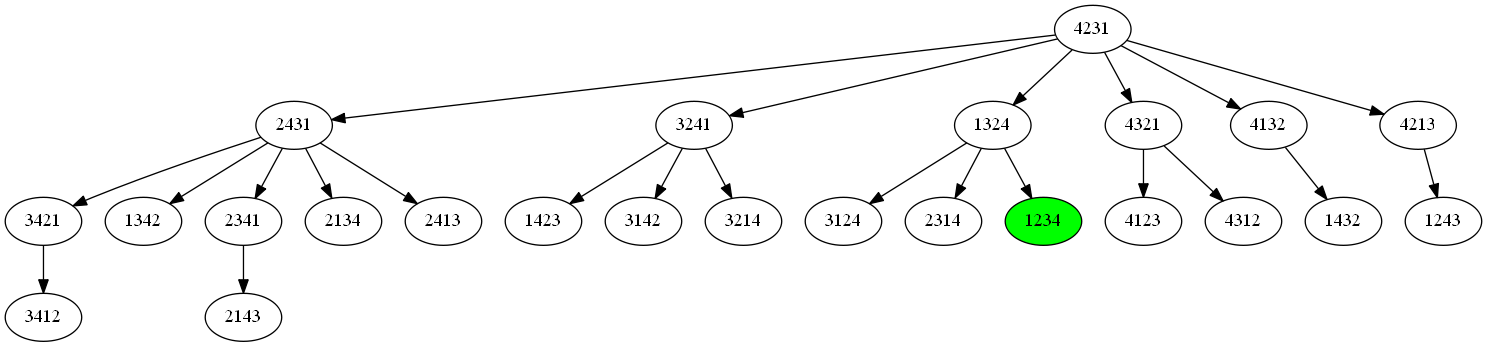

In [9]:
p = [4,2,3,1]
calcularConDosEspatulas(p)

# Dejandolo correr por 12 horas

In [ ]:
from datetime import datetime
cnt = 1
archivo = "timestamps.txt"
with open(archivo,"w+") as doc:
    doc.write("")
while True:
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    res =str(current_time)+'\n'
    res += str (cnt)+' '+str(peorCaso(cnt))+'\n'
    with open(archivo,"a") as doc:
        doc.write(res)
    cnt+=1